# **SAD2022Z_Report_[FilippoAlgeri]**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install anndata

In [4]:
import anndata as sc
import matplotlib.pyplot as plt
import pandas as pd

### **1. Exploration (19 pt.)**
In this Task it will be helpful to use anndata. It is a package used to operate on
.h5ad objects that is commonly used in scRNA-seq analysis. Quick tutorial here.
We will be dealing with sparse matrices, but you can always cast it to dense (watch
out for OOM) using the method sparsematrix.toarray().[testo del link](https://)

#### **(a) (1 pt.) Load your dataset using adata = sc.read h5ad(path) and report how many observations and variables the loaded training and test data sets contain.**

In [5]:
train_adata = sc.read_h5ad("/content/drive/My Drive/project 1/SAD2022Z_Project1_GEX_train.h5ad")
print('TRAIN')
print("observations:", train_adata.n_obs)
print("variables: ", train_adata.n_vars)

TRAIN
observations: 72208
variables:  5000


In [6]:
test_adata = sc.read_h5ad("/content/drive/My Drive/project 1/SAD2022Z_Project1_GEX_test.h5ad")
print('TEST')
print("observations:", test_adata.n_obs)
print("variables: ", test_adata.n_vars)

TEST
observations: 18052
variables:  5000


#### **(b) (3 pt.) Access the adata.X object, which contains a matrix of counts which has been already preprocessed, and the adata.layers[’counts’] object, which contains raw data. Plot histograms of both the raw data and the processed data. Pay attention to the X-axis and the range of values spanned by the data.**


In [7]:
train_adata.X

<72208x5000 sparse matrix of type '<class 'numpy.float32'>'
	with 32228572 stored elements in Compressed Sparse Row format>

In [8]:
X = train_adata.X.toarray()
X_data = pd.DataFrame(X)

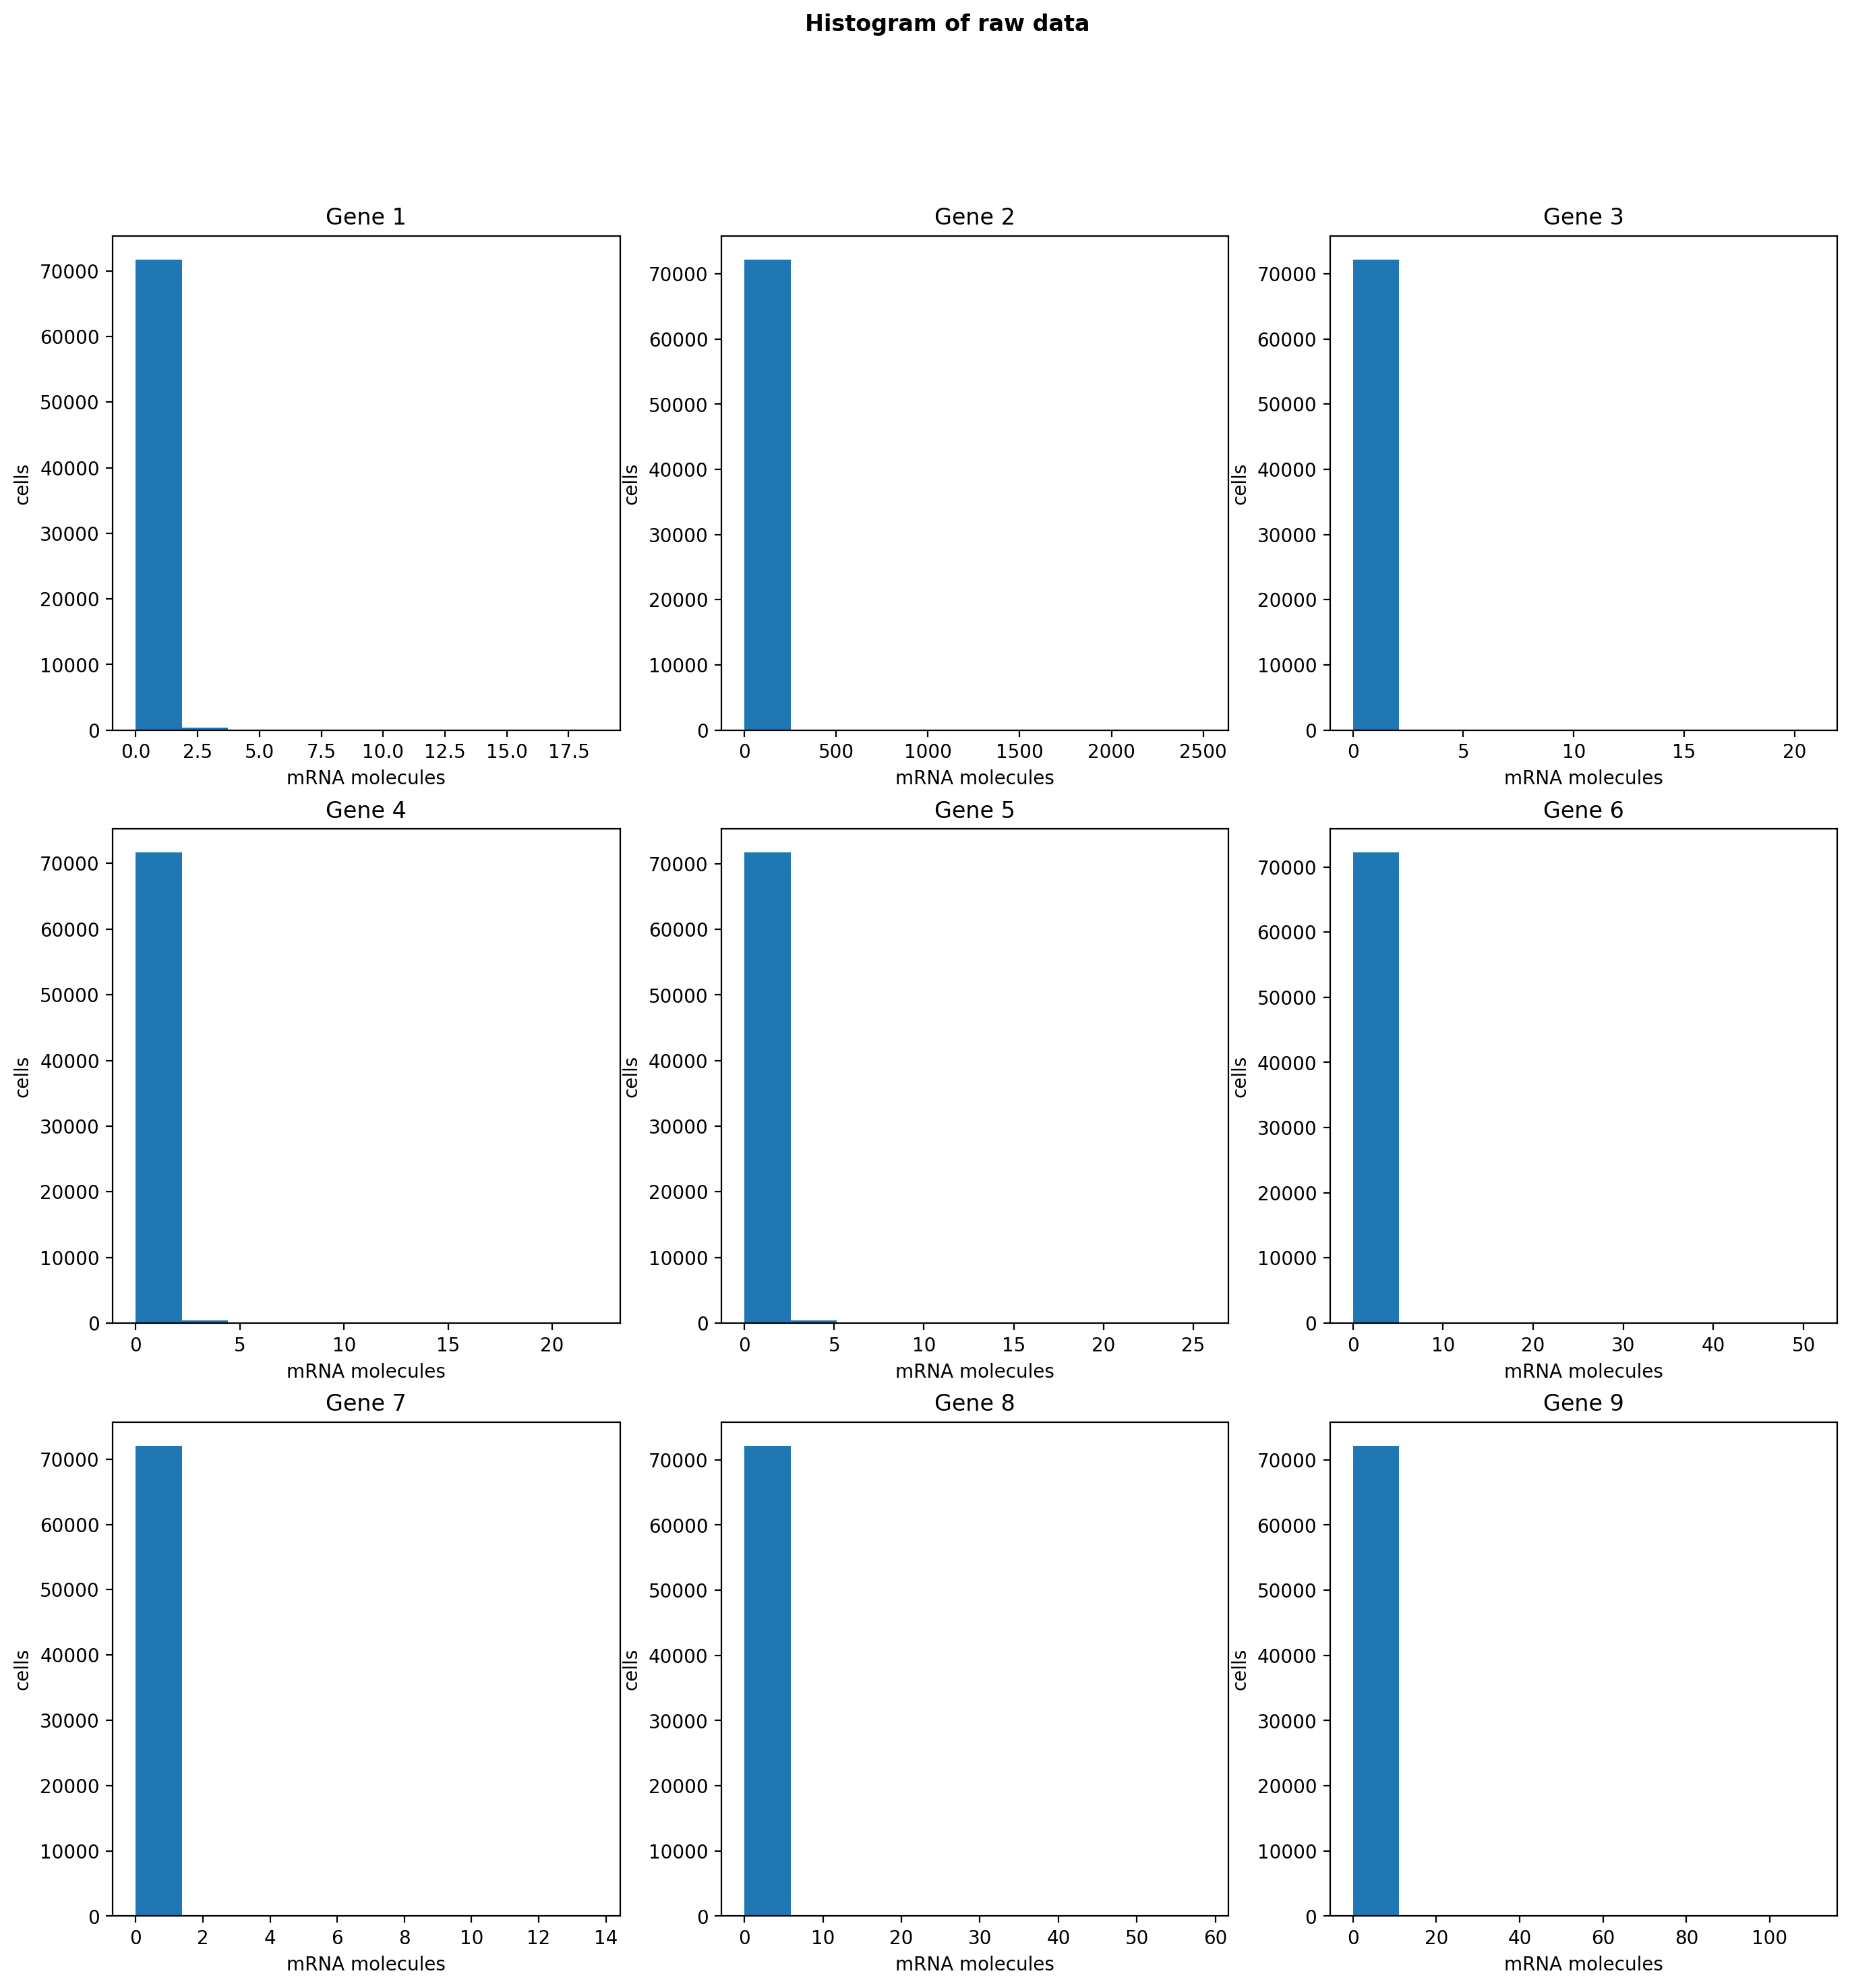

In [73]:
fig, axs = plt.subplots(3, 3, figsize=(16.5, 16.5))
fig.suptitle('Histogram of raw data', fontweight ="bold")

axs[0, 0].hist(X_data[0])
axs[0, 0].set_title('Gene 1')
axs[0, 1].hist(X_data[1])
axs[0, 1].set_title('Gene 2')
axs[0, 2].hist(X_data[2])
axs[0, 2].set_title('Gene 3')
axs[1, 0].hist(X_data[3])
axs[1, 0].set_title('Gene 4')
axs[1, 1].hist(X_data[4])
axs[1, 1].set_title('Gene 5')
axs[1, 2].hist(X_data[5])
axs[1, 2].set_title('Gene 6')
axs[2, 0].hist(X_data[6])
axs[2, 0].set_title('Gene 7')
axs[2, 1].hist(X_data[7])
axs[2, 1].set_title('Gene 8')
axs[2, 2].hist(X_data[8])
axs[2, 2].set_title('Gene 9')

for ax in axs.flat:
    ax.set(xlabel='mRNA molecules', ylabel='cells')


In [10]:
train_adata.layers['counts']

<72208x5000 sparse matrix of type '<class 'numpy.float32'>'
	with 32228572 stored elements in Compressed Sparse Row format>

In [11]:
layers = train_adata.layers['counts'].toarray()
layers_data = pd.DataFrame(layers)

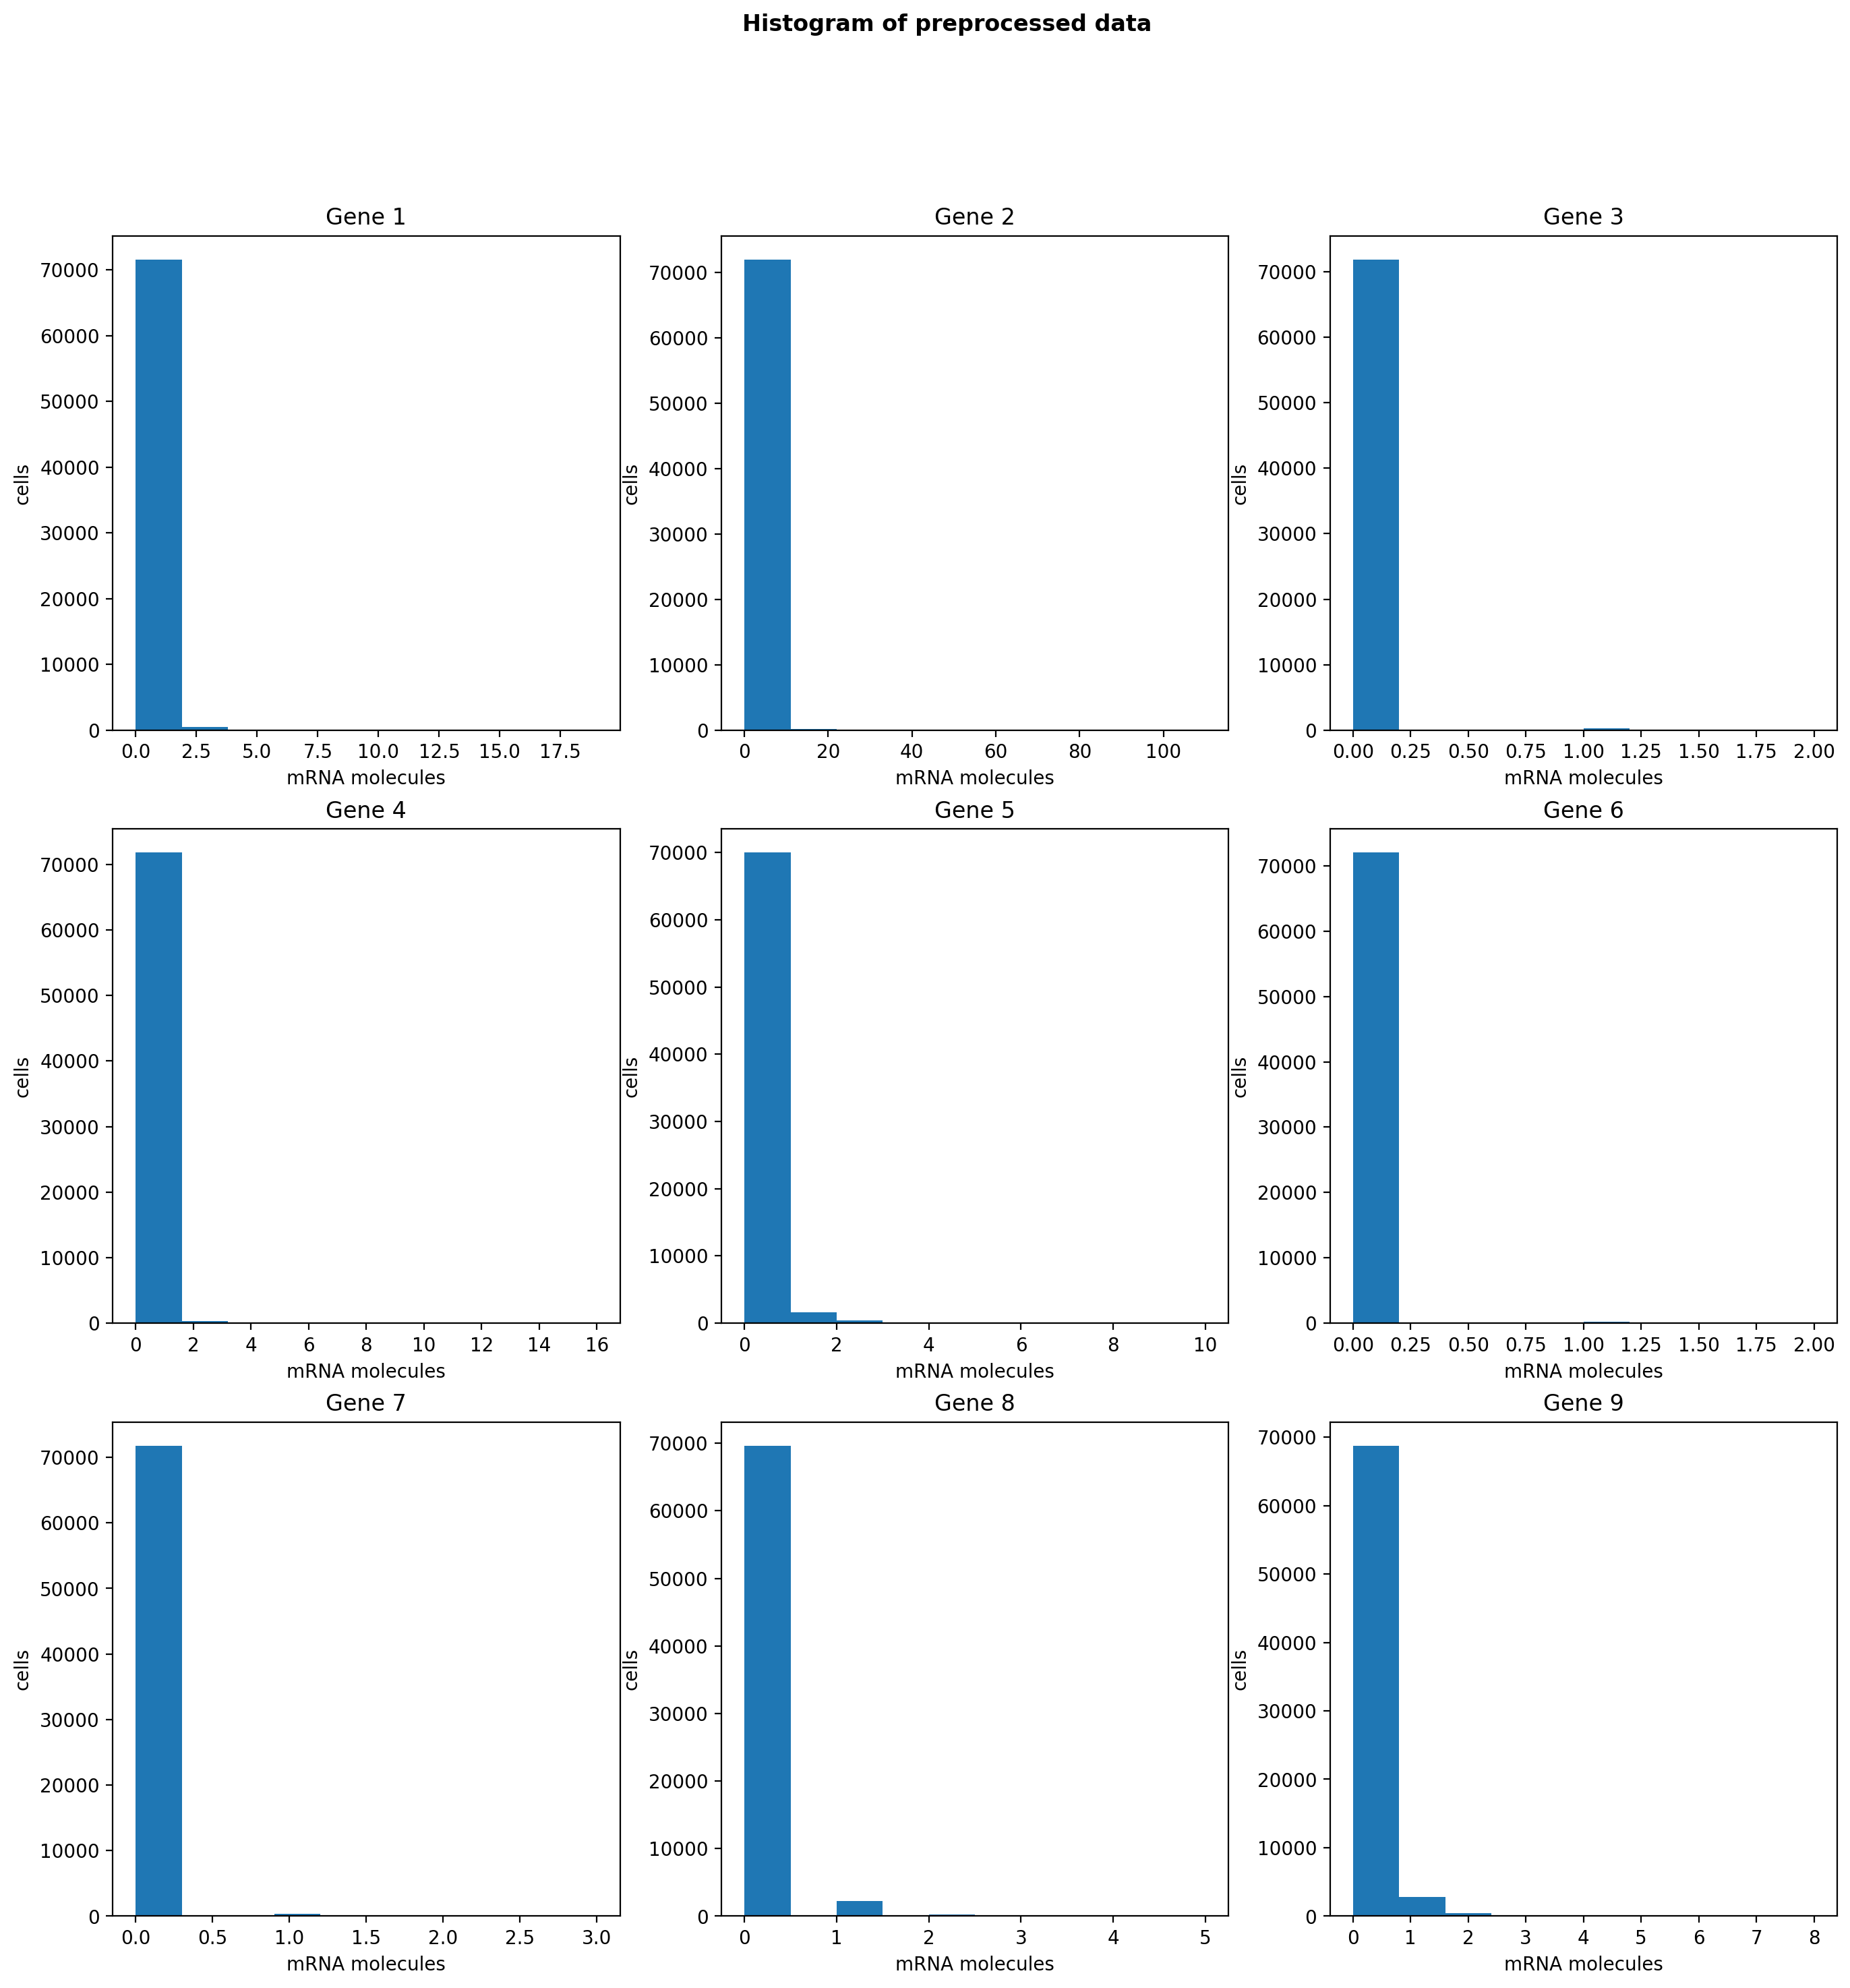

In [75]:
fig, axs = plt.subplots(3, 3, figsize=(16.5, 16.5))
fig.suptitle('Histogram of processed data', fontweight ="bold")

axs[0, 0].hist(layers_data[0])
axs[0, 0].set_title('Gene 1')
axs[0, 1].hist(layers_data[1])
axs[0, 1].set_title('Gene 2')
axs[0, 2].hist(layers_data[2])
axs[0, 2].set_title('Gene 3')
axs[1, 0].hist(layers_data[3])
axs[1, 0].set_title('Gene 4')
axs[1, 1].hist(layers_data[4])
axs[1, 1].set_title('Gene 5')
axs[1, 2].hist(layers_data[5])
axs[1, 2].set_title('Gene 6')
axs[2, 0].hist(layers_data[6])
axs[2, 0].set_title('Gene 7')
axs[2, 1].hist(layers_data[7])
axs[2, 1].set_title('Gene 8')
axs[2, 2].hist(layers_data[8])
axs[2, 2].set_title('Gene 9')

for ax in axs.flat:
    ax.set(xlabel='mRNA molecules', ylabel='cells')

#### **(c) (4 pt.) Explain what kind of preprocessing has been applied to the preprocessed matrix. Tip: You can also check min, max, mean, etc.**

In [81]:
print("RAW DATA")
print("////////")
print("////////")
for i in range(9):
  print("Max:", X_data[i].max())
  print("Mean:", X_data[i].mean())
  print("Var:", X_data[i].var())
  print("////////")
  
print("////////")
print("Nan values:", X_data.isnull().values.any())
print("////////")
print("Observation:", len(X_data))

RAW DATA
////////
////////
Max: 18.642887
Mean: 0.036447484
Var: 0.10827597
////////
Max: 2512.3457
Mean: 0.6781585
Var: 113.58026
////////
Max: 20.88651
Mean: 0.003943608
Var: 0.010829841
////////
Max: 22.14971
Mean: 0.052276466
Var: 0.14620984
////////
Max: 25.675884
Mean: 0.06207098
Var: 0.19294864
////////
Max: 51.162327
Mean: 0.0041508917
Var: 0.056346387
////////
Max: 13.732532
Mean: 0.0066971686
Var: 0.014789499
////////
Max: 58.726875
Mean: 0.036544137
Var: 0.16409214
////////
Max: 110.606415
Mean: 0.044342805
Var: 0.2962366
////////
////////
Nan values: False
////////
Observation: 72208


In [82]:
print("PREPROCESSED DATA")
print("////////")
print("////////")
for i in range(9):
  print("Max:", layers_data[i].max())
  print("Min:", layers_data[i].min())
  print("Mean:", layers_data[i].mean())
  print("Var:", layers_data[i].var())
  print("////////")

print("////////")
print("Nan values:", layers_data.isnull().values.any())
print("////////")
print("Observation:", len(layers_data))

PREPROCESSED DATA
////////
////////
Max: 19.0
Min: 0.0
Mean: 0.03926158
Var: 0.1187377
////////
Max: 110.0
Min: 0.0
Mean: 0.523917
Var: 2.5298474
////////
Max: 2.0
Min: 0.0
Mean: 0.004777864
Var: 0.0050874795
////////
Max: 16.0
Min: 0.0
Mean: 0.034109794
Var: 0.056850273
////////
Max: 10.0
Min: 0.0
Mean: 0.042599156
Var: 0.08044878
////////
Max: 2.0
Min: 0.0
Mean: 0.0026174386
Var: 0.0028045108
////////
Max: 3.0
Min: 0.0
Mean: 0.0059965653
Var: 0.006736237
////////
Max: 5.0
Min: 0.0
Mean: 0.03985708
Var: 0.05098247
////////
Max: 8.0
Min: 0.0
Mean: 0.06272158
Var: 0.11224582
////////
////////
Nan values: False
////////
Observation: 72208


No null values are present in both datasets. A decrease in mean and maximum value is observed, as well as a decrease in variance. The number of observations remains unchanged, so the removal of outliers is ruled out. It is possible that a transformation was applied to the data to allow an easier analysis, perhaps the data were standardised.

#### **(d) (3 pt.) Remove zeroes from both the raw and the processed matrices. Plot histograms of both modified data sets.**

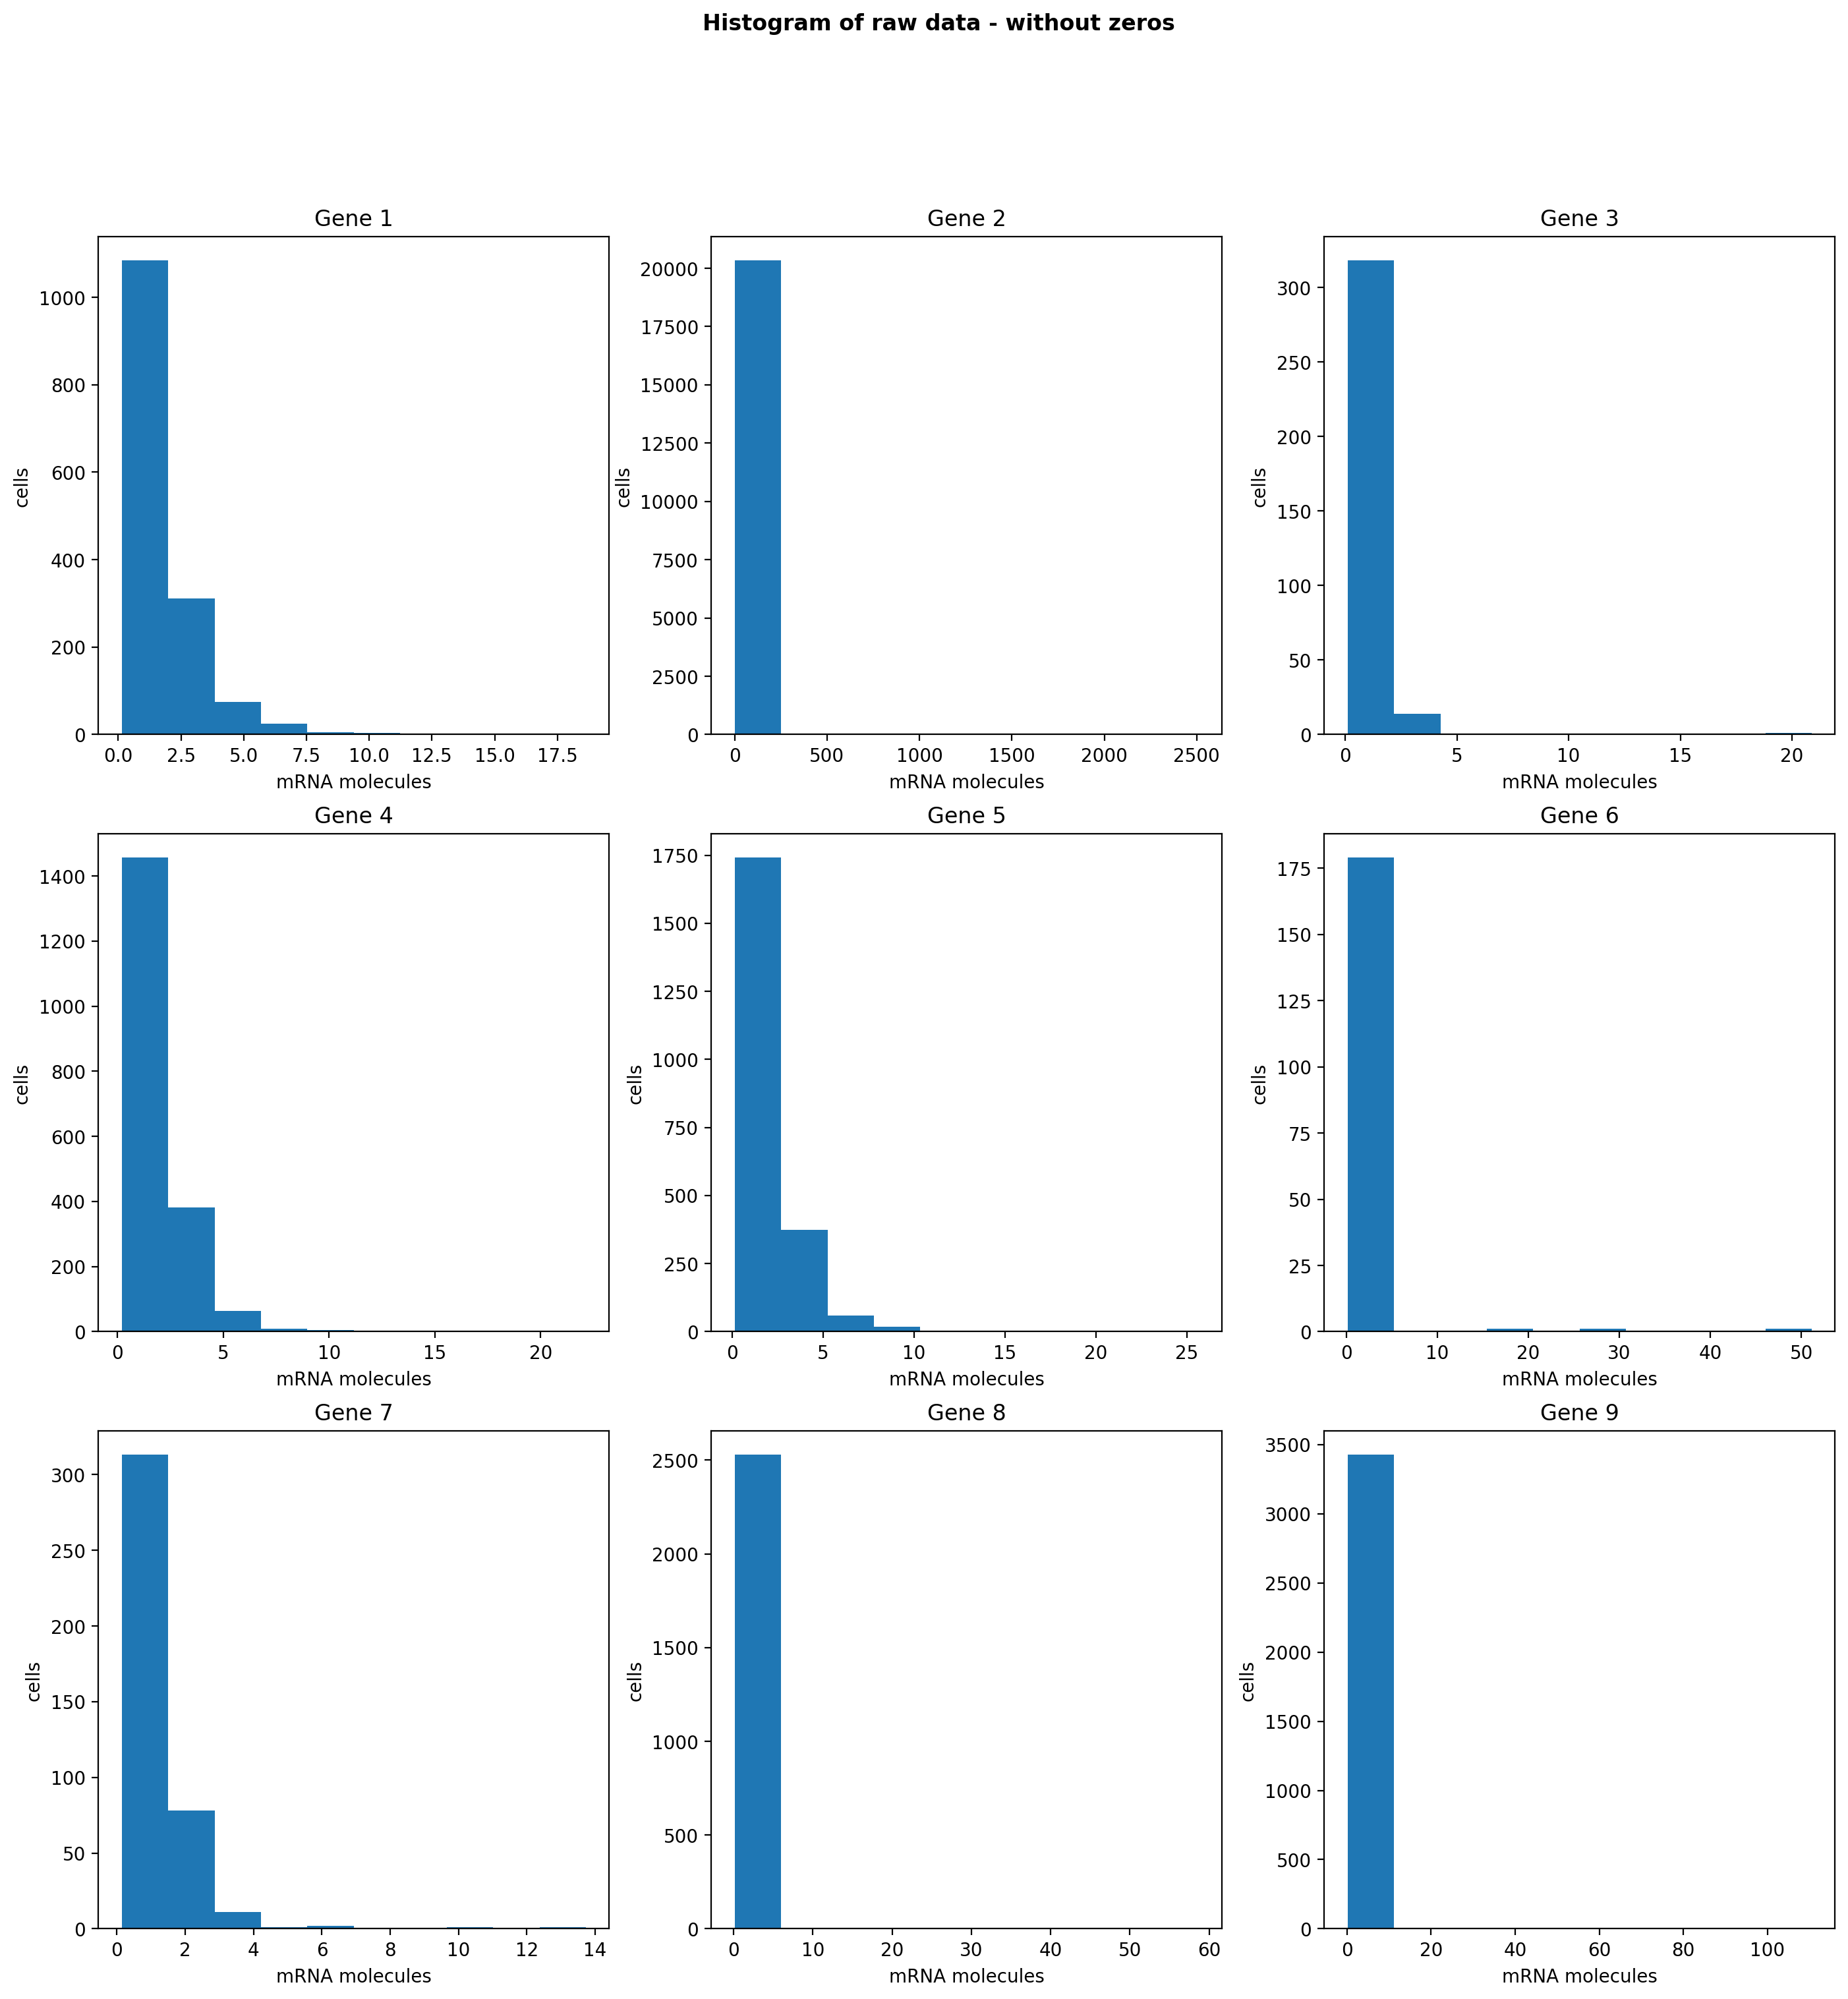

In [83]:
fig, axs = plt.subplots(3, 3, figsize=(17, 17))
fig.suptitle('Histogram of raw data - without zeros', fontweight ="bold")

axs[0, 0].hist(X_data[0][X_data[0] != 0])
axs[0, 0].set_title('Gene 1')
axs[0, 1].hist(X_data[1][X_data[1] != 0])
axs[0, 1].set_title('Gene 2')
axs[0, 2].hist(X_data[2][X_data[2] != 0])
axs[0, 2].set_title('Gene 3')
axs[1, 0].hist(X_data[3][X_data[3] != 0])
axs[1, 0].set_title('Gene 4')
axs[1, 1].hist(X_data[4][X_data[4] != 0])
axs[1, 1].set_title('Gene 5')
axs[1, 2].hist(X_data[5][X_data[5] != 0])
axs[1, 2].set_title('Gene 6')
axs[2, 0].hist(X_data[6][X_data[6] != 0])
axs[2, 0].set_title('Gene 7')
axs[2, 1].hist(X_data[7][X_data[7] != 0])
axs[2, 1].set_title('Gene 8')
axs[2, 2].hist(X_data[8][X_data[8] != 0])
axs[2, 2].set_title('Gene 9')

for ax in axs.flat:
    ax.set(xlabel='mRNA molecules', ylabel='cells')

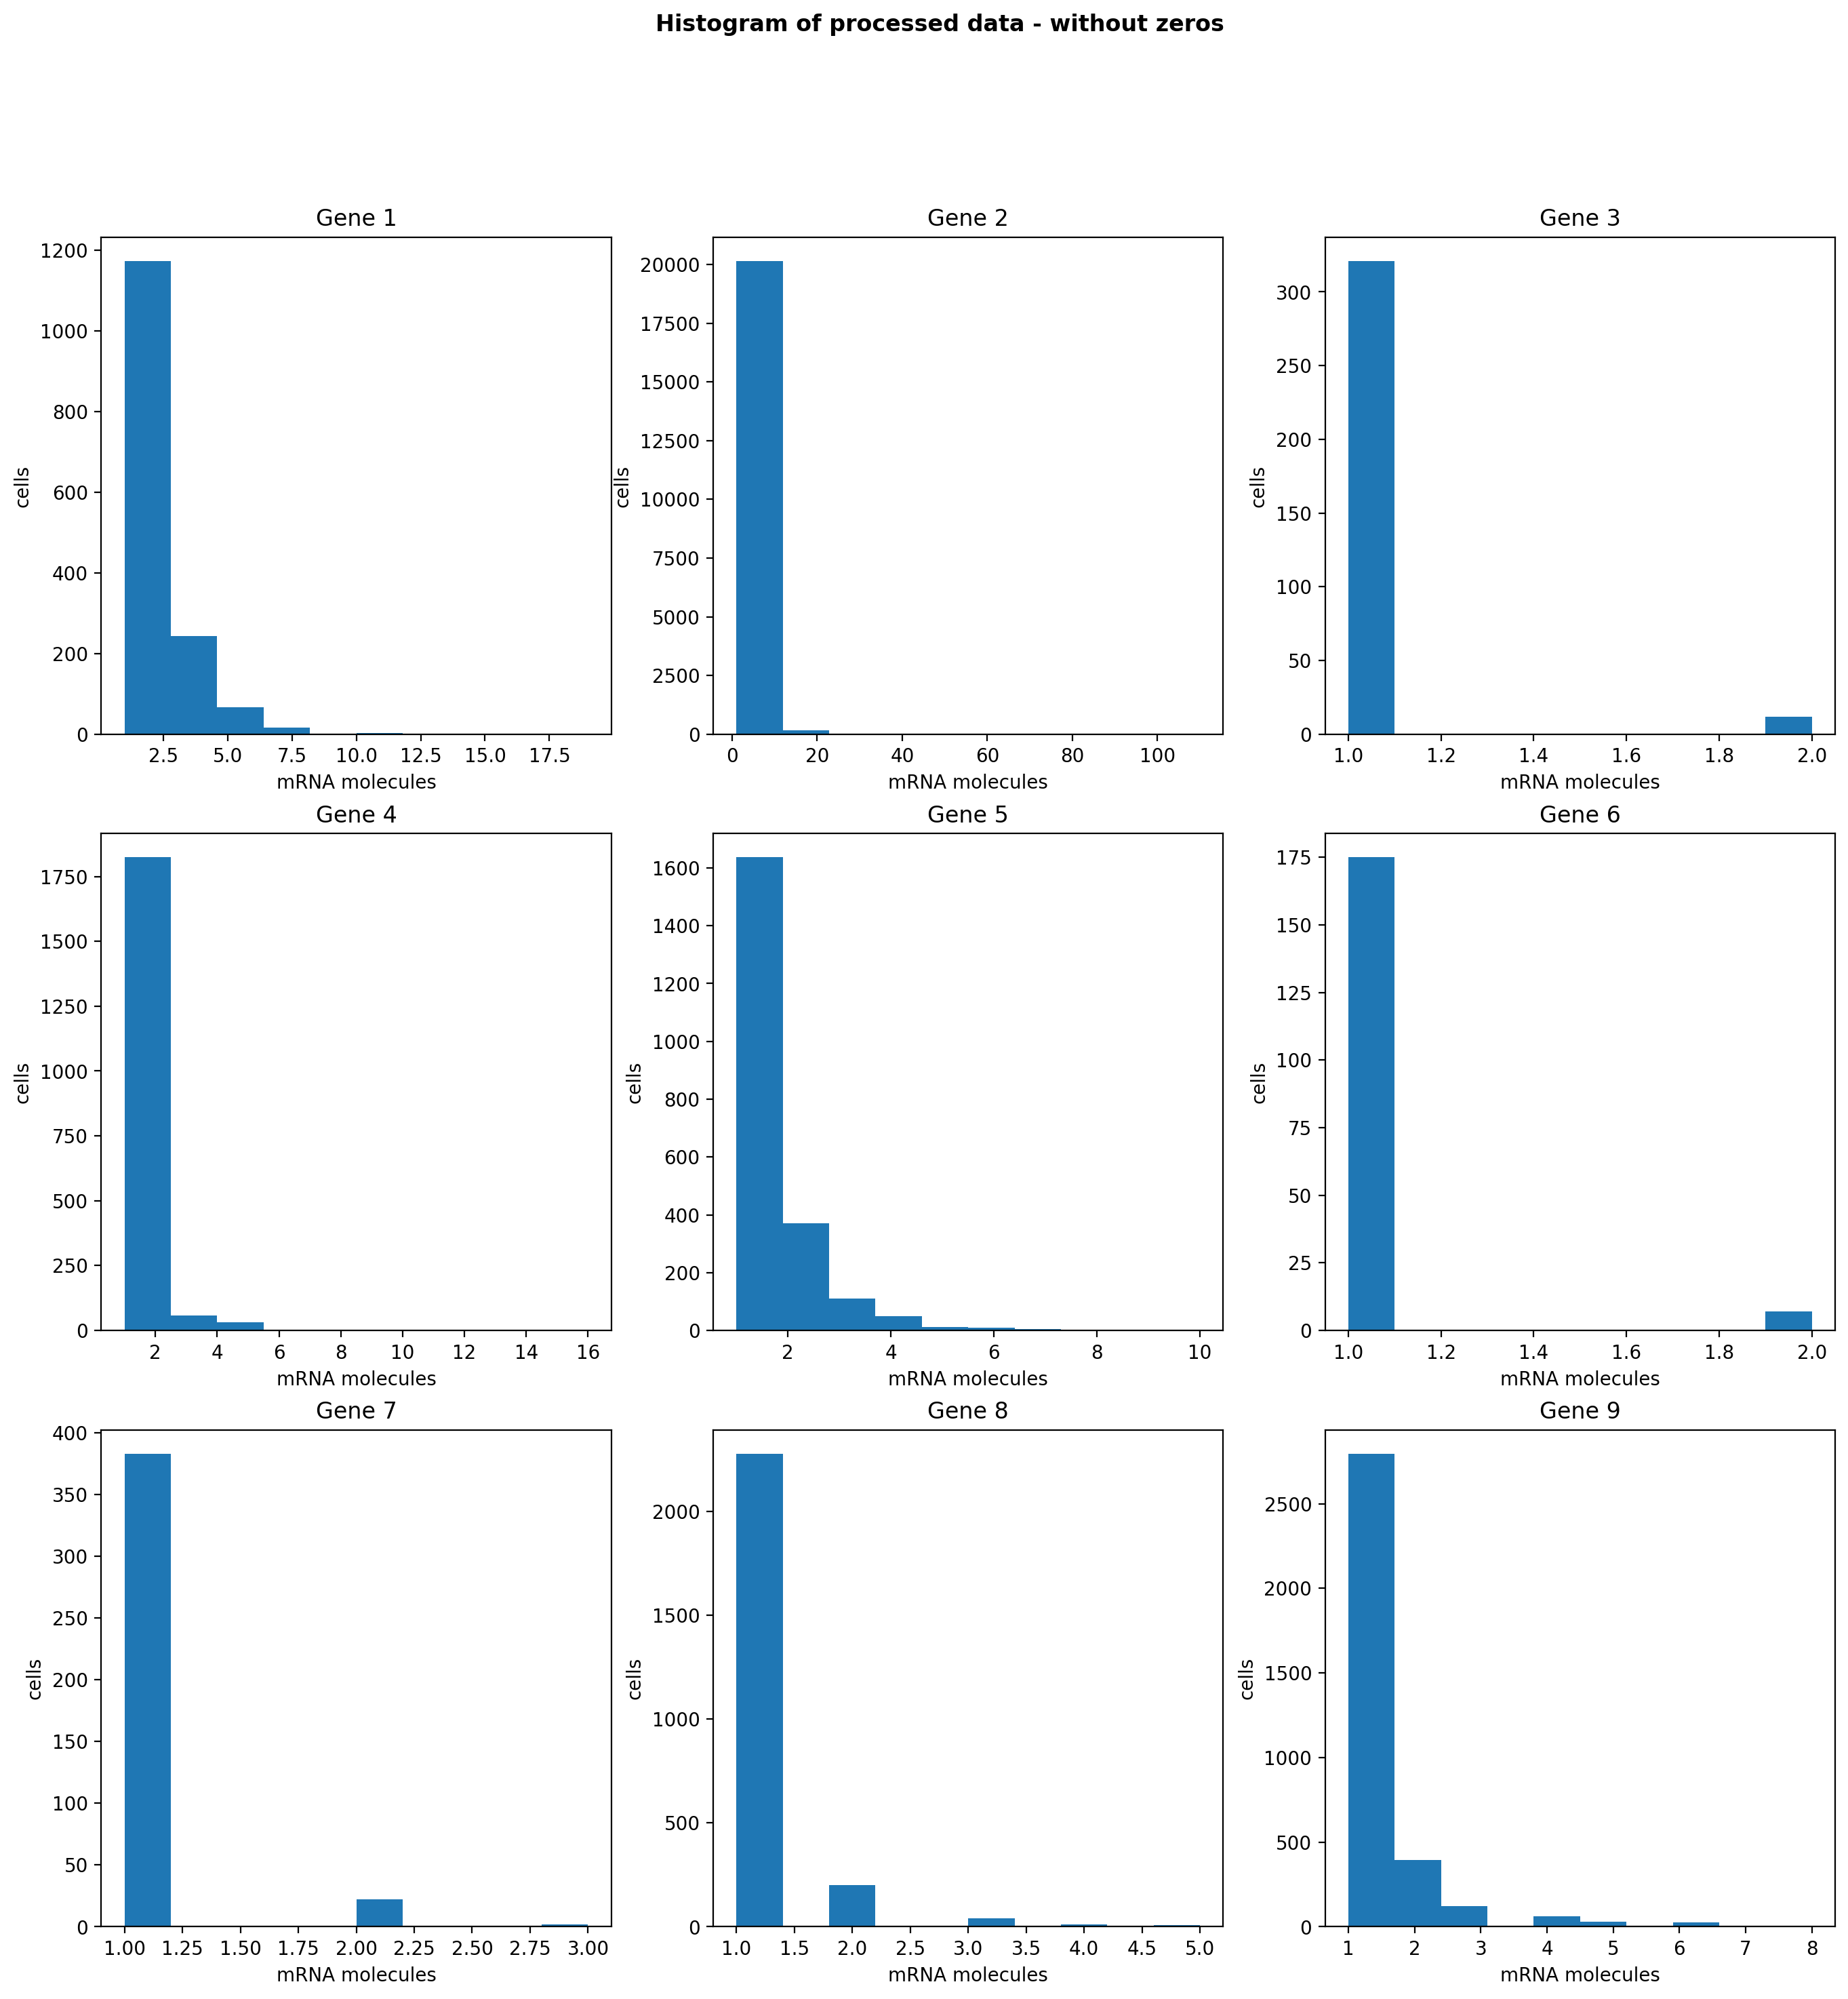

In [77]:
fig, axs = plt.subplots(3, 3, figsize=(16.5, 16.5))
fig.suptitle('Histogram of processed data - without zeros', fontweight ="bold")

axs[0, 0].hist(layers_data[0][layers_data[0] != 0])
axs[0, 0].set_title('Gene 1')
axs[0, 1].hist(layers_data[1][layers_data[1] != 0])
axs[0, 1].set_title('Gene 2')
axs[0, 2].hist(layers_data[2][layers_data[2] != 0])
axs[0, 2].set_title('Gene 3')
axs[1, 0].hist(layers_data[3][layers_data[3] != 0])
axs[1, 0].set_title('Gene 4')
axs[1, 1].hist(layers_data[4][layers_data[4] != 0])
axs[1, 1].set_title('Gene 5')
axs[1, 2].hist(layers_data[5][layers_data[5] != 0])
axs[1, 2].set_title('Gene 6')
axs[2, 0].hist(layers_data[6][layers_data[6] != 0])
axs[2, 0].set_title('Gene 7')
axs[2, 1].hist(layers_data[7][layers_data[7] != 0])
axs[2, 1].set_title('Gene 8')
axs[2, 2].hist(layers_data[8][layers_data[8] != 0])
axs[2, 2].set_title('Gene 9')

for ax in axs.flat:
    ax.set(xlabel='mRNA molecules', ylabel='cells')

#### **(e) (5 pt.) Explain what is the distribution of the data. Explain what the abundance of zeroes means in this context? Tip: There is an biological explanation.**

Each row of the 'gene expression matrix' corresponds to cells and the columns to genes. Each entry in this matrix is a count of the mRNA molecules present in a given cell. In a broad sense,
this data can be interpreted as gene activity. Put simply, the higher the count of a
gene in a given cell, the more active it is within the cell. \\
The zeros could be biological signals representing absence or low gene expression, or one could consider the zeros as missing data to be corrected.

#### **(f) (3 pt.) Access the adata.obs object. Explain what is the information contained in this data frame. Report the the number of patients, the number of labs, and the number of cell types in the data.**

In [78]:
train_adata.obs.head()

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,...,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train
AGTTCCCAGCACCTGC-1-s3d1,948,5.113025,1.371097,G2M,139,2278.0,23.0,CD14+ Mono,s3d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
CAGATTGCAAAGGCAC-1-s2d1,2323,4.077203,2.426149,S,91,1190.0,2.0,Erythroblast,s2d1,0.965441,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTCATGACAATTTCCT-1-s1d2,1952,7.838442,0.854908,G2M,123,4138.0,14.0,Naive CD20+ B IGKC+,s1d2,NaN,...,10886,35,28.6,B+,Asian,NOT HISPANIC OR LATINO,Female,True,Nonsmoker,train
TCATCCGCACTTGGCG-1-s2d5,1811,7.071157,1.387475,G2M,105,707.0,2.0,CD14+ Mono,s2d5,NaN,...,16710,40,27.8,O+,White,HISPANIC OR LATINO,Female,False,Smoker,iid_holdout
AGTGCCGGTCATCAGT-1-s2d5,796,4.107981,0.520903,S,96,945.0,4.0,NK,s2d5,NaN,...,16710,40,27.8,O+,White,HISPANIC OR LATINO,Female,False,Smoker,train


This dataset contains information about the donor patients, the laboratory that took the samples and the content of the samples (e.g. number of genes or number of antibodies). In total, there are 9 different donor patients, 4 laboratories and 45 cell types that were studied within this dataset.

In [19]:
patients = train_adata.obs['DonorID'].unique()
labs = train_adata.obs["Site"].unique()
cell_types = train_adata.obs['cell_type'].unique()

In [20]:
print("Number of patients:", len(patients))
print("Number of labs:", len(labs))
print("Number of cell type:", len(cell_types))

Number of patients: 9
Number of labs: 4
Number of cell type: 45


### **2. Vanilla VAE training (30 pt.)**
In this task you will adjust the VAE model you implemented during Lab 6 and Lab
7 so that it can be trained on scRNA-seq data. The input to the model (and the
output) should be the gene expression matrix. You need to decide whether you want
to use the raw or the preproccesed matrix (adata.X or adata.layers[’counts’].X).
Note that your VAE should have a stochastic Encoder, Decoder and be trained with
a probabilistic loss.

In [21]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200

In [22]:
class VariationalEncoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalEncoder, self).__init__()
        self.linear1 = nn.Linear(784, 512)
        self.linear2 = nn.Linear(512, latent_dims)
        self.linear3 = nn.Linear(512, latent_dims)

        self.N = torch.distributions.Normal(0, 1)
        self.N.loc = self.N.loc.cuda() # hack to get sampling on the GPU
        self.N.scale = self.N.scale.cuda()
        self.kl = 0

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.linear1(x))
        mu =  self.linear2(x)
        sigma = torch.exp(self.linear3(x))
        z = mu + sigma*self.N.sample(mu.shape)
        self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
        return z

class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        self.linear1 = nn.Linear(latent_dims, 512)
        self.linear2 = nn.Linear(512, 784)

    def forward(self, z):
        z = F.relu(self.linear1(z))
        z = torch.sigmoid(self.linear2(z))
        return z.reshape((-1, 1, 28, 28))

class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = VariationalEncoder(latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

(a) (10 pt.) Train a VAE model on the data. Verify the training procedure by
showing learning curves for both training and test sets. Reminder: By a learning curve we mean plotting the -ELBO against epoch numbers. Additionally,
break down ELBO into reconstruction and regularization losses and make a
plot accordingly.

In [23]:
def train(autoencoder, data, epochs=20):
    opt = torch.optim.Adam(autoencoder.parameters())
    for epoch in range(epochs):
        for x, y in data:
            x = x.to(device) # GPU
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).sum() + autoencoder.encoder.kl
            loss.backward()
            opt.step()
    return autoencoder

In [79]:
latent_dims = 2
data = layers

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
vae = VariationalAutoencoder(latent_dims).to(device) # GPU
vae = train(vae, data)

(b) (10 pt.) Fit a PCA to the latent space. What number of principal components
explains more than 95% of the variance? Show a table in which you choose
three different latent space sizes and report -ELBO on the test set for each of
the models.

(c) (5 pt.) Use a PCA to map all the encoded cells from the test set onto the top
two principal axes and show plots for all models from the previous point. Tip:
If the PCA plot collapses, try subsampling the observations to a smaller number.
Extend the PCA plots by colouring each point with adata.obs.cell type.


(d) (5 pt.) Choose the final model, explain your decision making process behind
choosing the data set (raw or preprocessed) and choosing the size of the latent
space.

### **3. Custom Decoder (35 pt.)**
In this task you will modify the Decoder of your VAE to better fit the distribution
of the data.

(a) (10 pt.) Using insights from Task 1 Exploration, implement a Decoder that
models the data distributed according to a sensible distribution. Explain you
reasoning behind choosing the Decoder.


(b) (20 pt.) Train a VAE with the new Decoder on data selected in the previous
task. Plot learning curves for the new model alongside the final model chosen
in the previous task. Note that here again you need to make an educated guess
on the size of the latent space. Is your new Decoder better?


(c) (5 pt.) Plot the latent space of your final model from this task and from the
previous task using PCA, as done in the previous exercise. Compare the plots.
Explain whether you see any differences.


### **4. Adjusting VAE for batch effect (15 pt.)**
The batch effect is a common and serious problem in scRNA-seq. Shortly, cells from
different sources, that are supposed to be similar to each other, are not close in the
low dimensional representation space. This creates the false impression that there
are many distinct groups of cells, but there are not. The main reason for this is
that the gene expression values are measured in different conditions, e.g. different
batches, times or different technicians.
In a dataset without the batch effect, we hope for a low dimensionality embedding
where the visual grouping (or even clustering) of the cells is guided solely with
biological signal (e.g. cell type). In turn, in a dataset where the batch effect is
present, the cells are visually grouped by lab/patient/other factors. The batch effect
can lead to incorrect conclusions about the underlying biological mechanism, as the
comparison between batches may be confounded by the batch effect.
In this task you will check whether we should be worried about batch effect in our
dataset and how to address such case by extending the VAE framework.

(a) (5 pt.) Extend the PCA plots from both Vanilla VAE and VAE with a custom
decoder so that the points are coloured by adata.obs.batch, adata.obs.DonorID,
and, most importantly, adata.obs.Site. Include the figures in the report.



(b) (10 pt.) Extend your VAE with a custom Decoder so that either:
(I) The model accepts a vector of site assignments that goes through encoder
(II) The model concatenates a vector of site assignments to the vector of latent
space, and the resulting vector goes through decoder.
Analyze the model and its latent space according to steps outlined in previous
tasks.